# 知乎数据分析初探 | Brief Data Analysis of Zhihu

## 一、数据收集

采用Python爬虫对知乎网进行爬取，通过爬取几名初始种子用户的关注列表，然后采用广度优先的遍历策略不断爬取已爬取用户的关注列表。爬取时段为2017年2月4日至2017年2月6日，耗时两天时间，爬取到第3层关注列表，共收集到66068名知乎用户的详细信息，并统计出他们相应的累计指标，具体数据如下：

<img src="1-1.png">

## 二、数据处理

爬虫收集到的数据被保存在mongdb数据库中。在mongo交互环境中使用以下命令将数据从数据库中提取出来，并以csv格式的文件保存：

zhihu_analysis.csv文件已共享在目录中。

引入程序所需的包：

In [2]:
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from __future__ import division #精确除法

使用pandas导入csv文件数据，并删除“favorite”和“eduction”两列：

In [3]:
df = pd.read_csv('zhihu_analysis.csv');
df = df.drop(['favourite', 'education'], axis=1);

查看数据表情况：

In [34]:
df

,_id,city,answer,name,job,question,company,token,vote,sex,field,depth,follower,following,article,thank
0,ObjectId(5895d463d19ca2781905c7c6),NaN,0,花音,NaN,0,NaN,hua-yin-62-78,0,NaN,NaN,0,0,0,0,0
1,ObjectId(5895d463d19ca2781905c7c7),NaN,0,Anna Tian,NaN,0,NaN,anna-tian,0,NaN,NaN,0,0,0,0,0
2,ObjectId(5895d463d19ca2781905c7c8),NaN,0,heyme0621,NaN,0,NaN,heyme0621,0,NaN,NaN,0,0,0,0,0
3,ObjectId(5895d463d19ca2781905c7c9),NaN,0,Dream Hunter,NaN,0,NaN,dreamhunter-6,0,NaN,NaN,0,0,0,0,0
4,ObjectId(5895d465d19ca2781905c7ca),NaN,297,夜家子鸢,NaN,0,NaN,ye-jia-zi-yuan,108825,0.0,NaN,1,8980,30,5,16744
5,ObjectId(5895d465d19ca2781905c7cb),北京,115,迟老湿,NaN,3,Physique & Health Counselor,natechi,127608,1.0,体育健身,1,73563,104,20,21272
6,ObjectId(5895d465d19ca2781905c7cc),香港,11,盖瑞,高级顾问,5,普华永道,epicranger,136,1.0,财务,1,261,117,0,72
7,ObjectId(5895d466d19ca2781905c7cd),西雅图（Seattle）,14001,vczh,Developer,462,Microsoft Office,excited-vczh,1051128,1.0,计算机软件,1,493906,1886,52,137918
8,ObjectId(5895d466d19ca2781905c7ce),NaN,3805,马文彬,NaN,5,NaN,ma-wen-bin-30,68883,1.0,教育,1,5956,6,14,12813
9,ObjectId(5895d467d19ca2781905c7cf),北京,238,夫人及老谢,审计经理,0,前四大会计师事务所,xie-yi-ran-47,789,1.0,审计,1,901,99,0,263


### 1. 基本统计

进行常规的数据统计，统计收集到的用户数，及他们产生的提问数、回答数、文章数、得赞数、感谢数、粉丝数等：

In [4]:
#Basic statistics
#total users
user_num = df.sex.value_counts().sum();
#total questuons
ques_num = df.question.sum();
#total answers
ans_num = df.answer.sum();
#total articles
arc_num = df.article.sum();
#total votes
vote_num = df.vote.sum();
#total followers
fe_num = df.follower.sum();
#summary
dict1 = {'Users':user_num, 'Questions':ques_num, 'Answers':ans_num, 'Articles':arc_num, 'Votes':vote_num, 'Followers':fe_num};
s = pd.Series(dict1);
s.to_csv('basic statistics.csv');

### 2. 一维变量统计

统计不同性别的用户数（1=male, 0=female, -1=unkown），并得到相应的条形图：

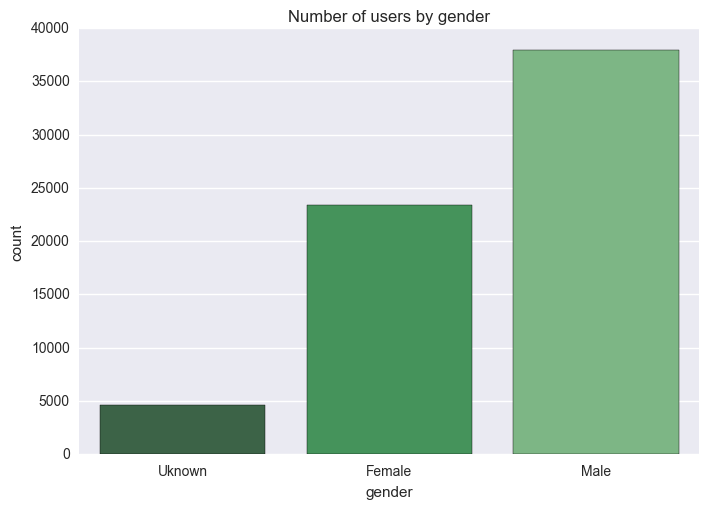

In [13]:
#性别统计
sns.set_style(style='darkgrid');
g1 = sns.countplot(x='sex', data=df, palette='Greens_d'); #一个Axes实例
g1.set_xticklabels(['Uknown', 'Female', 'Male']);
g1.set_title('Number of users by gender');
g1.set_xlabel('gender');

统计不同得赞数的用户占比情况：

In [7]:
#得赞数分布情况
b1 = df.token[df.vote==0].value_counts().sum();  #0
b2 = df.token[(df.vote>0) & (df.vote<100)].value_counts().sum();  #1-99
b3 = df.token[(df.vote>=100) & (df.vote<1000)].value_counts().sum(); #100-999
b4 = df.token[(df.vote>=1000) & (df.vote<10000)].value_counts().sum(); #1000-9999
b5 = df.token[(df.vote>=10000) & (df.vote<100000)].value_counts().sum(); #10000-99999
b6 = df.token[df.vote>99999].value_counts().sum(); #100000+
#summary
array3 = np.array([b1, b2, b3, b4, b5, b6]);
array4 = array3/user_num;
array4 = np.array(['{:.2%}'.format(x) for x in array4]);
dict3  = {'Users':array3, 'percentage':array4};
indx = ['0', '1-99', '100-999', '1000-9999', '10000-99999', '100000+'];
d2 = pd.DataFrame(dict3, index=indx);
d2.to_csv('ans_num.csv');

将上述占比绘制成饼状图：

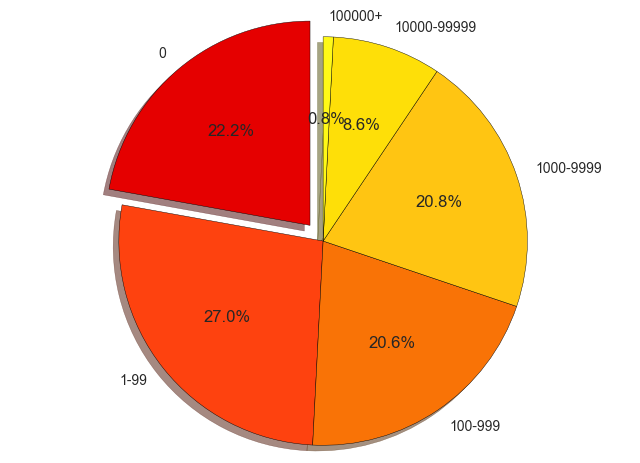

In [8]:
#plot
sizes = dict3['Users'];
labels = indx;
colors = [sns.xkcd_rgb["red"], sns.xkcd_rgb["orangered"], sns.xkcd_rgb["orange"], sns.xkcd_rgb["sunflower"], sns.xkcd_rgb["dandelion"], sns.xkcd_rgb["sunny yellow"]];
explode = (0.1, 0, 0, 0, 0, 0);
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90);
plt.axis('equal');

统计不同粉丝数的用户占比情况：

In [9]:
#被关注数分布
c1 = df.sex[df.follower==0].value_counts().sum();
c2 = df.sex[(df.follower>0) & (df.follower<100)].value_counts().sum();
c3 = df.sex[(df.follower>=100) & (df.follower<1000)].value_counts().sum();
c4 = df.sex[(df.follower>=1000) & (df.follower<10000)].value_counts().sum();
c5 = df.sex[(df.follower>=10000) & (df.follower<100000)].value_counts().sum();
c6 = df.sex[(df.follower>99999)].value_counts().sum();
#summary
array5 = np.array([c1, c2, c3, c4, c5, c6]);
array6 = array5/user_num;
array6 = np.array(['{:.2%}'.format(x) for x in array6]);
dict4  = {'Users':array5, 'Percentage':array6};
indx = ['0', '1-99', '100-999', '1000-9999', '10000-99999', '100000+'];
d3 = pd.DataFrame(dict4, index=indx);
d3.to_csv('follower_num.csv');

将上述占比绘制成饼状图：

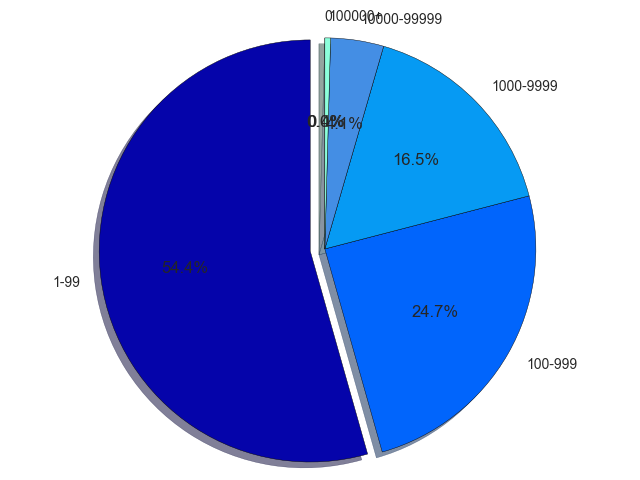

In [10]:
#plot
sizes = dict4['Users'];
labals = ['0', '1-99', '100-999', '1000-9999', '10000-99999\n', '100000+\n'];
colors = [sns.xkcd_rgb["navy blue"], sns.xkcd_rgb["royal blue"], sns.xkcd_rgb["bright blue"], sns.xkcd_rgb["azure"], sns.xkcd_rgb["dark sky blue"], sns.xkcd_rgb["light aqua"]];
explode = (0, 0.07, 0, 0, 0, 0);
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90);
plt.axis('equal');

### 3. 多维变量统计

统计不同回答数、得赞数、粉丝数组合的用户占比情况：

In [16]:
#回答、赞成、关注分布情况
a1 = df.sex[(df.answer==0) & (df.follower==0)].value_counts().sum();
a2 = df.sex[(df.answer==0) & (df.follower!=0)].value_counts().sum();
a3 = df.sex[(df.answer!=0) & (df.vote==0) & (df.follower==0)].value_counts().sum();
a4 = df.sex[(df.answer!=0) & (df.vote==0) & (df.follower!=0)].value_counts().sum();
a5 = df.sex[(df.answer!=0) & (df.vote!=0) & (df.follower==0)].value_counts().sum();
a6 = df.sex[(df.answer!=0) & (df.vote!=0) & (df.follower!=0)].value_counts().sum();
#summary
array1 = np.array([a1, a2, a3, a4, a5, a6]);
array2 = array1/user_num;
array2 = np.array(['{:.2%}'.format(x) for x in array2]); #小数转换为百分数
dict2 = {'Users':array1, 'Percentage':array2};
indx = ['No answers & No followers', 'No answers & Has followers', 'Has answers & No votes & No followers', 'Has answers & Has votes & No followers', 'Has answers & No votes & Has followers', 'Has answers & Has votes & Has followers'];
d1 = pd.DataFrame(dict2, index=indx);
d1.to_csv('ans_vote_fe.csv');

将上述占比绘制成饼状图：

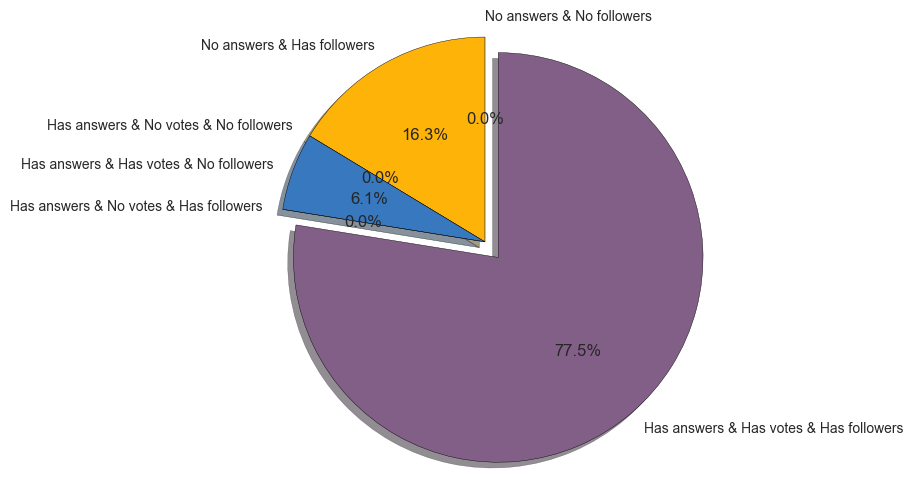

In [17]:
#plot
sizes = dict2['Users'];
labels = indx;
#labels = [unicode(x, 'utf-8') for x in indx]; #utf-8转换为unicode
colors = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["amber"], sns.xkcd_rgb["greyish"], sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["faded green"], sns.xkcd_rgb["dusty purple"]];
explode = (0, 0, 0, 0, 0, 0.1);
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90);
plt.axis('equal');

### 4.变量的相关性探索

回答数与得赞数的相关性（回答的有效点赞率，y轴已用log做处理）以及用区分男女的情况：

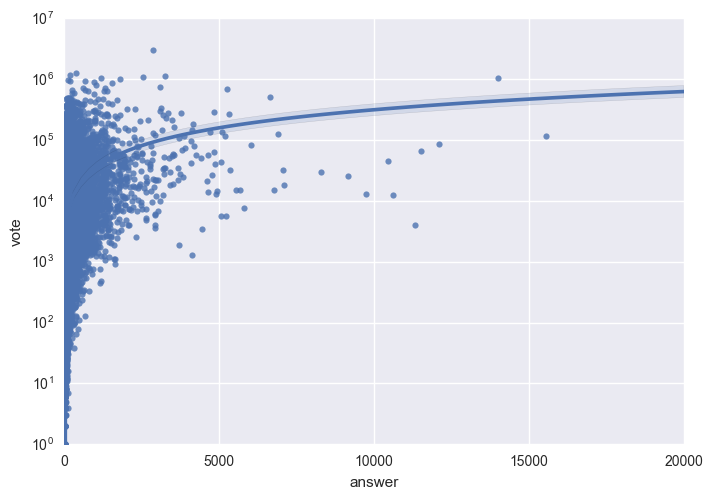

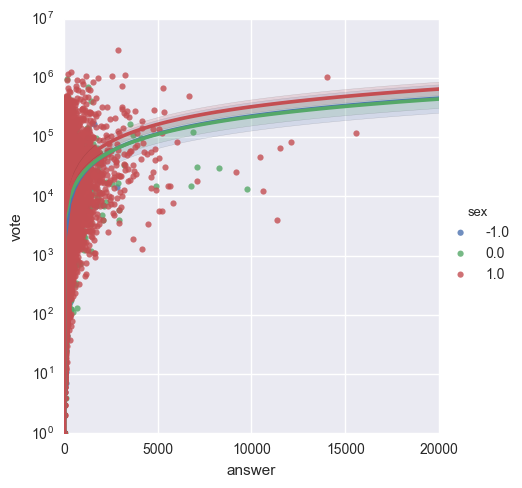

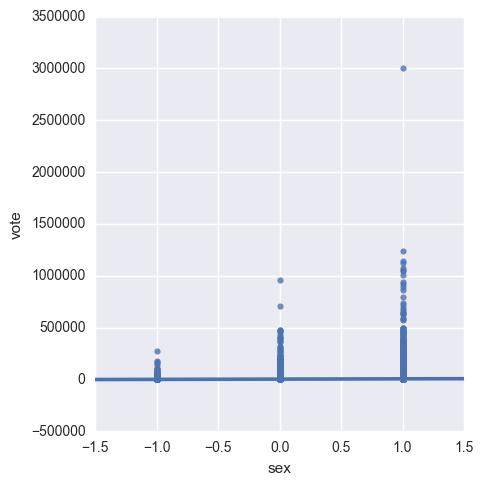

In [18]:
#回答数与得赞数
g2 = sns.regplot(x='answer', y='vote', data=df);
g2.set_yscale('log');
g2.set_xlim(0, 20000);
g2.set_ylim(1,10000000);
g3 = sns.lmplot(x='answer', y='vote', hue='sex', data=df);
g3.fig.get_axes()[0].set_yscale('log');
g3.fig.get_axes()[0].set_xlim(0, 20000);
g3.fig.get_axes()[0].set_ylim(1,10000000);
g4 = sns.lmplot(x='sex', y='vote', data=df);

得赞数与粉丝数的相关性（点赞后的有效吸粉率，y轴已用log做处理）以及用区分男女的情况：

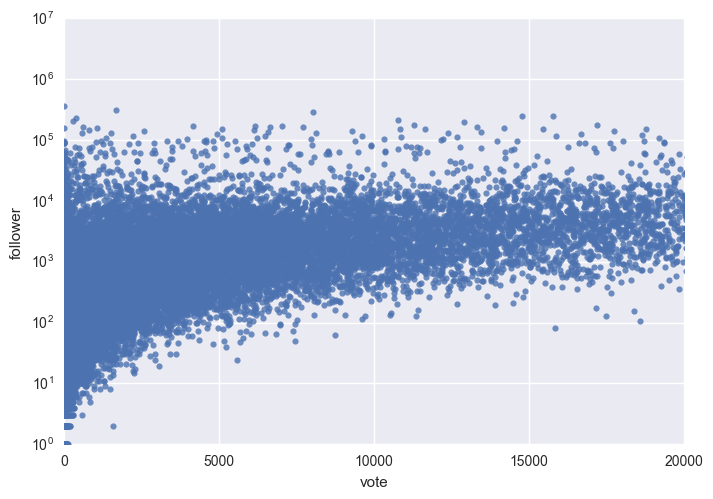

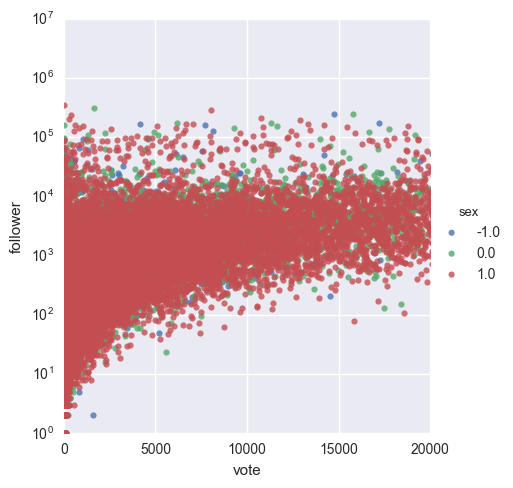

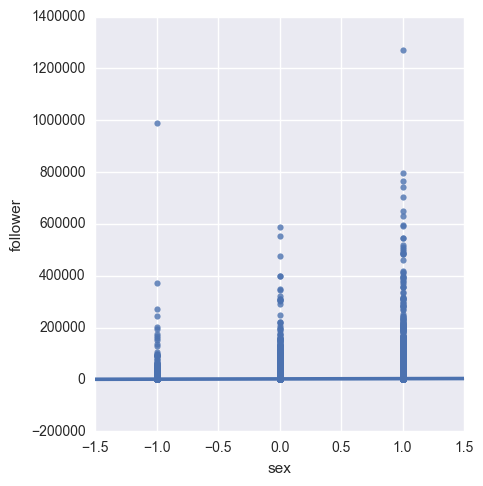

In [19]:
#得赞数与被关注数
g5 = sns.regplot(x='vote', y='follower', data=df);
g5.set_yscale('log');
g5.set_xlim(0, 20000);
g5.set_ylim(1,10000000);
g6 = sns.lmplot(x='vote', y='follower', hue='sex', data=df);
g6.fig.get_axes()[0].set_yscale('log');
g6.fig.get_axes()[0].set_xlim(0, 20000);
g6.fig.get_axes()[0].set_ylim(1,10000000);
g7 = sns.lmplot(x='sex', y='follower', data=df);

### 5.特殊点的处理

最大V（得赞数最多；粉丝数最多）：

In [28]:
sp1 = df.loc[df['vote'].idxmax()];
sp1

_id          ObjectId(5895d5a3d19ca2781905ca10)
city                                        NaN
answer                                     2880
name                                        张佳玮
job                                         NaN
question                                      0
company                                     NaN
token                             zhang-jia-wei
vote                                    3001784
sex                                           1
field                                       NaN
depth                                         2
follower                                1271285
following                                    80
article                                     656
thank                                    496455
Name: 586, dtype: object

In [29]:
sp2 = df.loc[df['follower'].idxmax()];
sp2

_id          ObjectId(5895d5a3d19ca2781905ca10)
city                                        NaN
answer                                     2880
name                                        张佳玮
job                                         NaN
question                                      0
company                                     NaN
token                             zhang-jia-wei
vote                                    3001784
sex                                           1
field                                       NaN
depth                                         2
follower                                1271285
following                                    80
article                                     656
thank                                    496455
Name: 586, dtype: object

当当当当，两奖项得主均为张佳伟同学 (。・`ω´・)

最好学（提问数/回答数=max）：

In [26]:
sp3 = df.loc[(df['question'] / df['answer']).idxmax()];
sp3

_id          ObjectId(589601e6d19ca2781905f52d)
city                                         北京
answer                                        4
name                                         歆盐
job                                         NaN
question                                   2060
company                                     海盗船
token                                   xin-yan
vote                                        991
sex                                           0
field                                       互联网
depth                                         2
follower                                   3291
following                                  1749
article                                       1
thank                                       724
Name: 11623, dtype: object

这位仁兄，提了2060个问题，只回答了4个答案...遂翻看其知乎账号，发现每个提问的关注量还不错，说明提问质量还蛮高。这年头，靠提问也可以吸粉儿3000...

最热心（回答数/提问数=max）：

In [31]:
sp4 = df.loc[(df['answer'] / df['question']).idxmax()];
sp4

_id          ObjectId(5896a9aad19ca27819065069)
city                                         南京
answer                                    11342
name                                         浪琴
job                              php programmer
question                                      1
company                                     NaN
token                               lang-qin-83
vote                                       3987
sex                                           1
field                                     计算机软件
depth                                         3
follower                                    483
following                                     3
article                                       5
thank                                      2186
Name: 34979, dtype: object

回答10000+个问题，却只得到3987个赞，平均每个问题得赞0.036，有人说，我一个回答就赚1万...

最清高（粉丝数/关注别人数=max）：

In [32]:
sp5 = df.loc[(df['follower'] / df['following']).idxmax()];
sp5

_id          ObjectId(5895d712d19ca2781905cc37)
city                                   ᐖᐇ  ᓏ  ᐛ
answer                                     3789
name                                        野合菌
job                                         NaN
question                                     87
company                                     NaN
token                                 fox4x4x4x
vote                                     280165
sex                                           1
field                                        保健
depth                                         2
follower                                  80791
following                                     1
article                                       8
thank                                     50903
Name: 1137, dtype: object

yoyo，我有8万粉儿，但就是不回粉儿(≖ ‿ ≖)✧ 

最苦逼（关注别人数/粉丝数=max）：

In [33]:
sp6 = df.loc[(df['following'] / df['follower']).idxmax()];
sp6

_id          ObjectId(5896bdeed19ca2781906614d)
city                                        NaN
answer                                        0
name                                       红耳朵U
job                                         NaN
question                                      0
company                                     NaN
token                             hong-er-duo-u
vote                                          0
sex                                           1
field                                       NaN
depth                                         3
follower                                      1
following                                   726
article                                       0
thank                                         0
Name: 39303, dtype: object

我在一个黑暗的角落默默注视着你们  ಥ_ಥ

### 6.局限性

本次练习主要是对知乎数据分析的一个初步尝试，主要误差来自：

（1）爬虫用户数据仅收集了6万+，相对全部的几百万用户，量级不够；

（2）爬虫的策略为不断爬取用户的关注列表，导致爬得的用户都拥有粉丝，整体倾向活跃的头部，忽略了淹没在茫茫人海的普罗大众，因此上述分析中的饼状图并未出现2/8法则，因此，该情况不能代表总体情况；

（3）爬虫仅收集了用户及用户的相关信息，并未收集到用户-关注-回答-点赞等关系数据，无法进行更进一步的分析，后续将在以上不足中进行改进~

KEEP GOING...